In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [64]:

from matplotlib.pylab import rcParams
rcParams['font.family']='AppleGothic'
rcParams['figure.figsize']=17,8

import warnings
warnings.filterwarnings('ignore')

In [65]:
wine_data_red = pd.read_csv('winequality-red.csv',sep = ';') # csv
wine_data_red ['type'] = 0 # red
wine_data_red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [66]:
wine_data_white = pd.read_csv('winequality-white.csv',sep = ';')
wine_data_white ['type'] = 1 # white
wine_data_white



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [67]:
print(wine_data_red.shape)

print(wine_data_white.shape)

(1599, 13)
(4898, 13)


In [68]:
wine_data_final = pd.concat([wine_data_red, wine_data_white], axis = 0, ignore_index= True) # ignore_index= True index를 새롭게 만들어 주겠다

wine_data_final.shape

wine_data_final.info()
wine_data_final.quality.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [69]:
# quality.unique() 값을 재설정해보자
list(sorted((wine_data_final.quality.unique())))

[3, 4, 5, 6, 7, 8, 9]

In [70]:
# 등급마다 몇개의 와인이 있는지 count
wine_data_final.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [71]:
wine_data_final[wine_data_final.quality == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


#### EDA Analysis

In [72]:
wine_data_final.columns

# 'fixed acidity' => 'fixed_acidity'

wine_data_final.columns = wine_data_final.columns.str.replace(' ', '_')
wine_data_final.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [73]:
# 그룹별 분석? 와인 종류에 따라서 품질이 얼마나 다를까? red = 0, white = 1
wine_data_final.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


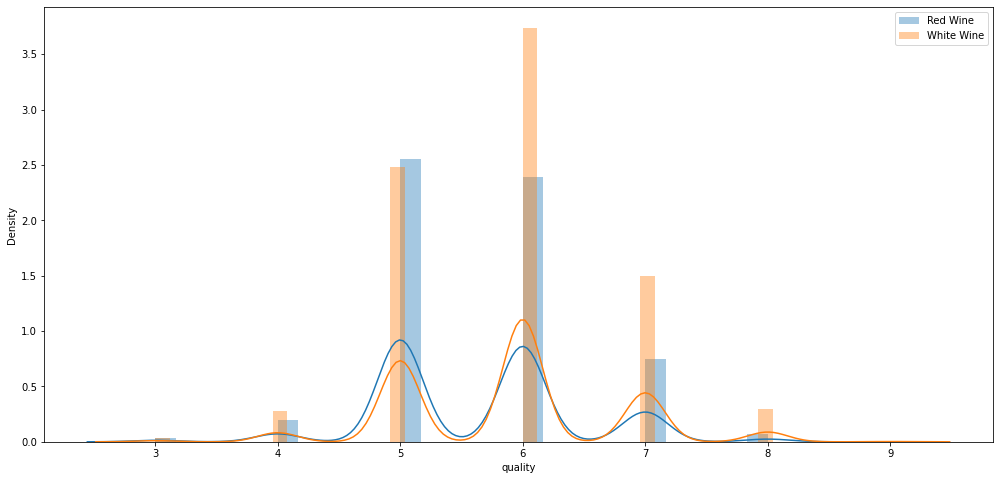

In [74]:
red_quality = wine_data_final.loc[wine_data_final.type==0, 'quality']
white_quality = wine_data_final.loc[wine_data_final.type==1, 'quality']


sns.distplot(red_quality, label = 'Red Wine')
sns.distplot(white_quality, label = 'White Wine')
plt.legend()



#### T - 검정 
- 와인 종류에 따른 품질의 차이가 통계적으로 유의한지 알기위해
- P-VALUE <0.05: 95%이상의 신뢰수준으로 두 그룹간 품질의 차이가 통계적으로 유의하다

 


In [75]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [76]:
t, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [77]:
'T값은 %.3f 이고, p-value는 %.10f'%(t,pvalue)

'T값은 -9.686 이고, p-value는 0.0000000000'

In [78]:
wine_data_final.corrwith(wine_data_final.quality).sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

In [79]:
# 산점도그래프
# Red 300, White random 300 sampling 
def sampling(data, n = 300):
    return data.loc[np.random.choice(data.index, replace = False, size = n)]


In [81]:
red = wine_data_final[wine_data_final.type == 0]
white = wine_data_final[wine_data_final.type == 1]

red_sample = sampling(red)

print(red_sample.shape)
red_sample.head(1)

(300, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
107,6.2,0.63,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,5,0


In [82]:
white_sample = sampling(white)

print(white_sample.shape)
white_sample.head(1)

(300, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
5032,6.2,0.255,0.27,1.3,0.037,30.0,86.0,0.98834,3.05,0.59,12.9,7,1


In [88]:
wine_sample = pd.concat([red_sample , white_sample], axis = 0)
wine_sample

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5,0
470,13.0,0.320,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6,5,0
1485,7.0,0.655,0.16,2.1,0.074,8.0,25.0,0.99606,3.37,0.55,9.7,5,0
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6,0
155,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,7.8,0.290,0.36,7.0,0.042,38.0,161.0,0.99410,3.26,0.37,11.2,8,1
2216,7.8,0.260,0.27,1.9,0.051,52.0,195.0,0.99280,3.23,0.50,10.9,6,1
2676,7.8,0.260,0.44,1.3,0.037,43.0,132.0,0.99440,3.18,0.65,10.0,5,1
2090,7.1,0.230,0.39,1.6,0.032,12.0,65.0,0.98980,3.25,0.40,12.7,7,1


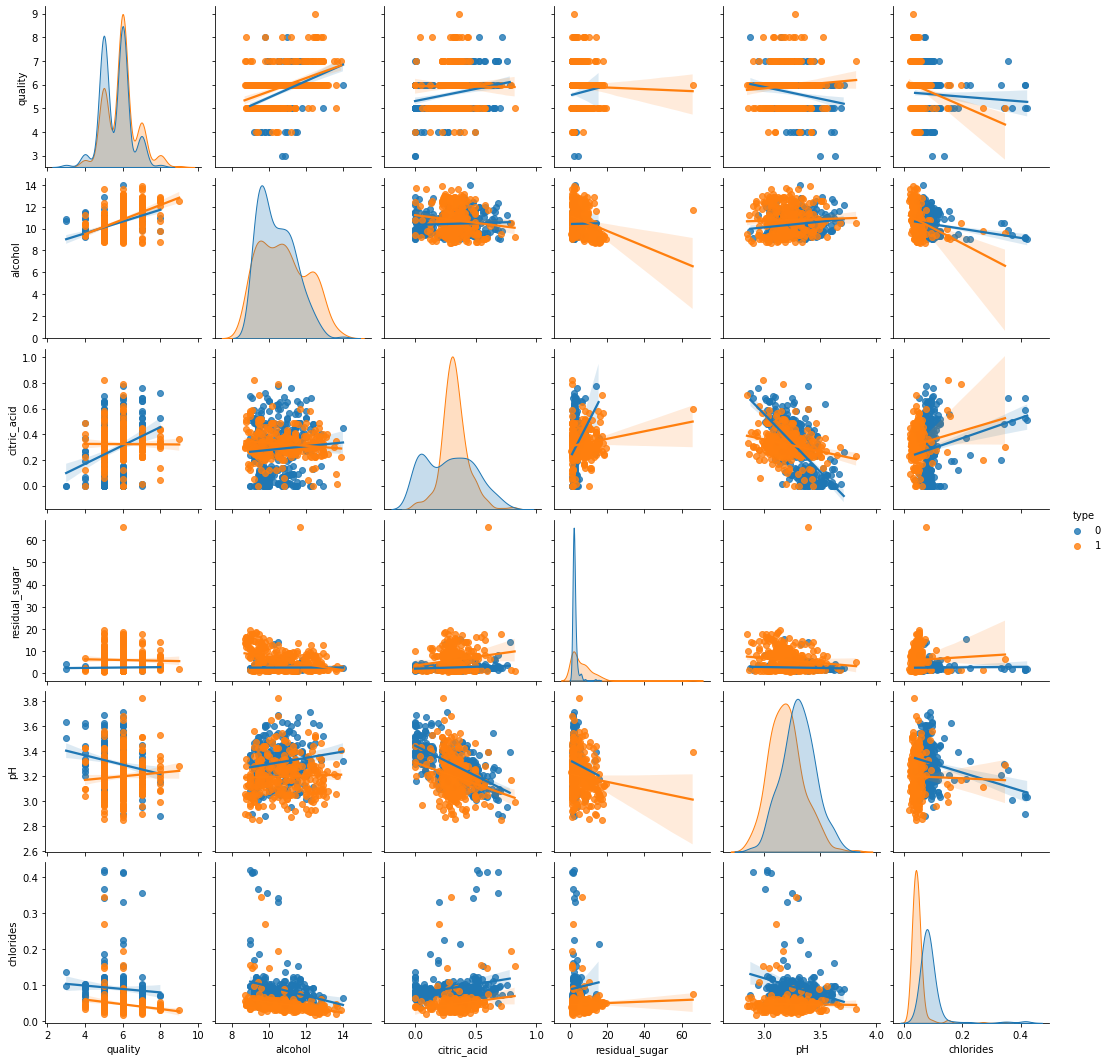

In [90]:
# pairplot
sns.pairplot(wine_sample,kind = 'reg', hue = 'type', vars = ['quality','alcohol','citric_acid','residual_sugar','pH','chlorides'])